# Proyek Analisis Data: [Air Quality Dataset]

*   all data quality dataset


- **Nama:** [M Irwan]
- **Email:** [onesltns@gmail.com]
- **ID Dicoding:** [M Irwan]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola dan tren kualitas udara (misalnya, PM2.5, PM10) di berbagai stasiun dari tahun 2013 hingga 2017? Apakah ada musim atau waktu tertentu yang cenderung lebih buruk kualitas udaranya ?

- Bagaimana pengaruh cuaca seperti suhu, kecepatan angin, dan curah hujan terhadap tingkat polutan di berbagai stasiun? Apakah ada pola tertentu ?

- Bagaimana perbandingan kualitas udara di antara berbagai stasiun? Stasiun mana yang secara konsisten memiliki kualitas udara lebih baik atau lebih buruk, dan apa faktor yang berkontribusi ?

- Apakah ada hubungan antara polutan tertentu, seperti PM2.5 dan PM10, dengan dampak pada kesehatan, seperti standar WHO untuk polusi udara? Apakah sering terjadi pelampauan batas ambang polusi di stasiun tertentu?



## Import Semua Packages/Library yang Digunakan

In [86]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
df_aotizhongxin = pd.read_csv('Data/PRSA_Data_Aotizhongxin.csv')
df_aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight :**
- Data yang menunjukkan nilai PM2.5 dan PM10 yang cukup tinggi (di atas 50 µg/m³ untuk PM10 dan 25 µg/m³ untuk PM2.5) mengindikasikan bahwa polusi udara sering melebihi ambang batas aman WHO

In [3]:
df_changping = pd.read_csv('Data/PRSA_Data_Changping.csv')
df_changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**insight :**
- Kecepatan Angin Rendah (WSPM): Kecepatan angin juga cukup rendah (sekitar 0.5 hingga 2.1 m/s), yang berarti polutan mungkin tidak tersebar dengan baik dan tetap berada di area lokal.

In [4]:
df_dingling = pd.read_csv('Data/PRSA_Data_Dingling.csv')
df_dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**insight :**
- Kondisi Suhu yang Sangat Rendah: Suhu dalam data ini berada di kisaran -2.3°C hingga -3.6°C, yang menunjukkan kondisi cuaca dingin. Suhu rendah seperti ini dapat menyebabkan akumulasi polutan karena udara lebih stabil dan kurangnya aliran udara untuk menyebarkan polutan
- Data pada NO2 masih ada yang NaN

In [5]:
df_dongsi = pd.read_csv('Data/PRSA_Data_Dongsi.csv')
df_dongsi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight :**
- Kecepatan angin (WSPM) berkisar antara 3.2 hingga 5.7 m/s, yang menunjukkan adanya angin dengan kecepatan sedang
- Nilai pada SO2 dan NO2 masih ada nilai NaN

In [6]:
df_guanyuan = pd.read_csv('Data/PRSA_Data_Guanyuan.csv')
df_guanyuan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**insight :**
- Konsentrasi polutan lain seperti SO2, NO2, dan CO menunjukkan variasi yang cukup besar. Misalnya, NO2 berkisar antara 17 hingga 24 µg/m³, yang merupakan variasi yang cukup besar dalam waktu singkat. Ini bisa menunjukkan adanya sumber polusi spesifik yang menyebabkan lonjakan NO2 pada waktu tertentu


In [7]:
df_gucheng = pd.read_csv('Data/PRSA_Data_Gucheng.csv')
df_gucheng.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


**insight :**
- Adanya data yang bernilai NaN pada NO2, SO2, CO, O3
- Nilai PM2.5 stabil di angka 5 hingga 6 µg/m³, sedangkan PM10 bervariasi dari 15 hingga 20 µg/m³. Konsentrasi ini tidak ekstrem, namun tetap dalam kategori yang perlu dipantau, terutama pada nilai PM10 yang mendekati batas yang memerlukan perhatian lebih.

In [8]:
df_huairou = pd.read_csv('Data/PRSA_Data_Huairou.csv')
df_huairou.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


**Insight :**
- Polutan seperti CO berada di rentang yang cukup tinggi, dengan nilai mencapai 1000 µg/m³ pada beberapa jam. Tingginya CO mungkin menunjukkan adanya sumber polusi yang signifikan, seperti pembakaran bahan bakar atau aktivitas kendaraan bermotor.
- adanya niali NaN pada SO2, NO2, CO, CO3

In [9]:
df_nongzhanguan = pd.read_csv('Data/PRSA_Data_Nongzhanguan.csv')
df_nongzhanguan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**insight :**
- PM2.5 berkisar antara 3 hingga 8 µg/m³, sementara PM10 lebih tinggi, berkisar antara 6 hingga 14 µg/m³. Konsentrasi PM10 yang lebih tinggi menunjukkan bahwa partikel kasar di udara lebih dominan di stasiun ini dibandingkan partikel halus.

In [10]:
df_shunyi = pd.read_csv('Data/PRSA_Data_Shunyi.csv')
df_shunyi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**insight :**
- adanya nilai NaN pada SO2, NSO2, CO, O3
- Kecepatan angin (WSPM) berkisar antara 4.5 hingga 9.4 m/s, yang relatif tinggi dibandingkan stasiun lainnya. Angin yang kuat ini dapat membantu menyebarkan polutan dan mengurangi konsentrasi lokal.

In [11]:
df_tiantan = pd.read_csv('Data/PRSA_Data_Tiantan.csv')
df_tiantan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**insight :**
- PM2.5 stabil di sekitar 5 hingga 6 µg/m³, sementara PM10 menunjukkan variasi yang cukup signifikan, berkisar antara 5 hingga 29 µg/m³. Lonjakan PM10 yang tinggi pada jam kedua mungkin terkait dengan aktivitas atau sumber polusi tertentu.

In [12]:
df_wanliu = pd.read_csv('Data/PRSA_Data_Wanliu.csv')
df_wanliu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


**insight :**
- NO2 bervariasi, dengan konsentrasi mencapai 28 µg/m³ pada jam pertama dan kedua, yang menunjukkan adanya sumber polusi seperti lalu lintas kendaraan. Sementara itu, CO mencapai 400 hingga 500 µg/m³, mengindikasikan adanya polusi dari pembakaran atau emisi kendaraan bermotor.
- adanya nilai NaN pada SO2, NO2, CO, O3

In [13]:
df_wanshouxigong = pd.read_csv('Data/PRSA_Data_Wanshouxigong.csv')
df_wanshouxigong.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**insight :**
- PM2.5 berkisar antara 8 hingga 11 µg/m³, sementara PM10 bervariasi antara 8 hingga 11 µg/m³. Tidak ada lonjakan besar pada kedua polutan ini, tetapi konsistensi polusi pada kisaran ini tetap perlu diperhatikan.
- adanya nilai NaN pada SO2, NO2, CO, O3

### Assessing Data

In [14]:
df_aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         35064 non-null  int64         
 1   PM2.5      35064 non-null  float64       
 2   PM10       35064 non-null  float64       
 3   SO2        35064 non-null  float64       
 4   NO2        35064 non-null  float64       
 5   CO         35064 non-null  float64       
 6   O3         35064 non-null  float64       
 7   TEMP       35064 non-null  float64       
 8   PRES       35064 non-null  float64       
 9   DEWP       35064 non-null  float64       
 10  RAIN       35064 non-null  float64       
 11  wd         35064 non-null  object        
 12  WSPM       35064 non-null  float64       
 13  station    35064 non-null  object        
 14  date_time  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


No           0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
date_time    0
dtype: int64

**insight :**
- Kolom PM2.5, PM10, SO2, NO2, CO, O3, dan RAIN memiliki nilai yang hilang 

In [15]:
df_aotizhongxin.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Insight :**
- menghitung nilai missing value menggunakan isna

In [16]:
df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM memiliki nilia yang hilang

In [17]:
df_changping.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

**Insight :**
- menghitung nilai missing value menggunakan isna

In [18]:
df_dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [19]:
df_dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

**Insight :**
- menghitung nilai missing value menggunakan isna

In [20]:
df_guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [21]:
df_guanyuan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Insight :**
- menghitung nilai missing value menggunakn isna

In [22]:
df_gucheng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [23]:
df_gucheng.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

**Insight :**
- menghitung nilai missing value menggunakan isna

In [24]:
df_huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [25]:
df_huairou.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

**Insight :**
- menghitung nilai missing value menggunakan isna

In [26]:
df_nongzhanguan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [27]:
df_nongzhanguan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight :**
- menghitung nilia missing value menggunakan isna

In [28]:
df_shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [29]:
df_shunyi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

**Insight :**
- menghitung nilia missing value menggunakan isna

In [30]:
df_tiantan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [31]:
df_tiantan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight :**
- Menghitung nilai missing value menggunakan isna

In [32]:
df_wanliu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [33]:
df_wanliu.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

**Insight :**
- menghitung nilai missing value menggunakan isna

In [34]:
df_wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEEWP, RAIN, wd, WSPM memiliki nilai missing value

In [35]:
df_wanshouxigong.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

**Insight :**
- menghitung nilai missing value menggunakn isna

### Cleaning Data

In [36]:
# Teknik Median
df_aotizhongxin['PM2.5'] = df_aotizhongxin['PM2.5'].fillna(df_aotizhongxin['PM2.5'].median())
df_aotizhongxin['PM10'] = df_aotizhongxin['PM10'].fillna(df_aotizhongxin['PM10'].median())
df_aotizhongxin['SO2'] = df_aotizhongxin['SO2'].fillna(df_aotizhongxin['SO2'].median())
df_aotizhongxin['NO2'] = df_aotizhongxin['NO2'].fillna(df_aotizhongxin['NO2'].median())
df_aotizhongxin['CO'] = df_aotizhongxin['CO'].fillna(df_aotizhongxin['CO'].median())
df_aotizhongxin['O3'] = df_aotizhongxin['O3'].fillna(df_aotizhongxin['O3'].median())

# Teknik interpolasi
df_aotizhongxin['TEMP'] = df_aotizhongxin['TEMP'].interpolate(method='linear')
df_aotizhongxin['PRES'] = df_aotizhongxin['PRES'].interpolate(method='linear')
df_aotizhongxin['DEWP'] = df_aotizhongxin['DEWP'].interpolate(method='linear')
df_aotizhongxin['RAIN'] = df_aotizhongxin['RAIN'].interpolate(method='linear')
df_aotizhongxin['WSPM'] = df_aotizhongxin['WSPM'].interpolate(method='linear')

# Teknik Modus
df_aotizhongxin['wd'] = df_aotizhongxin['wd'].fillna(df_aotizhongxin['wd'].mode()[0])

df_aotizhongxin.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [37]:
# Teknik Median

df_changping['PM2.5'] = df_changping['PM2.5'].fillna(df_changping['PM2.5'].median())
df_changping['PM10'] = df_changping['PM10'].fillna(df_changping['PM10'].median())
df_changping['SO2'] = df_changping['SO2'].fillna(df_changping['SO2'].median())
df_changping['NO2'] = df_changping['NO2'].fillna(df_changping['NO2'].median())
df_changping['CO'] = df_changping['CO'].fillna(df_changping['CO'].median())
df_changping['O3'] = df_changping['O3'].fillna(df_changping['O3'].median())

# Teknik Interpolasi

df_changping['TEMP'] = df_changping['TEMP'].interpolate(method='linear')
df_changping['PRES'] = df_changping['PRES'].interpolate(method='linear')
df_changping['DEWP'] = df_changping['DEWP'].interpolate(method='linear')
df_changping['RAIN'] = df_changping['RAIN'].interpolate(method='linear')
df_changping['WSPM'] = df_changping['WSPM'].interpolate(method='linear')

# Teknik Modus
df_changping['wd'] = df_changping['wd'].fillna(df_changping['wd'].mode()[0])

df_changping.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [38]:
# Teknik Median

df_dingling['PM2.5'] = df_dingling['PM2.5'].fillna(df_dingling['PM2.5'].median())
df_dingling['PM10'] = df_dingling['PM10'].fillna(df_dingling['PM10'].median())
df_dingling['SO2'] = df_dingling['SO2'].fillna(df_dingling['SO2'].median())
df_dingling['NO2'] = df_dingling['NO2'].fillna(df_dingling['NO2'].median())
df_dingling['CO'] = df_dingling['CO'].fillna(df_dingling['CO'].median())
df_dingling['O3'] = df_dingling['O3'].fillna(df_dingling['O3'].median())

# Teknik Interpolasi

df_dingling['TEMP'] = df_dingling['TEMP'].interpolate(method='linear')
df_dingling['PRES'] = df_dingling['PRES'].interpolate(method='linear')
df_dingling['DEWP'] = df_dingling['DEWP'].interpolate(method='linear')
df_dingling['RAIN'] = df_dingling['RAIN'].interpolate(method='linear')
df_dingling['WSPM'] = df_dingling['WSPM'].interpolate(method='linear')

# Teknik Modus

df_dingling['wd'] = df_dingling['wd'].fillna(df_dingling['wd'].mode()[0])

df_dingling.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [39]:
# Teknik Median

df_dongsi['PM2.5'] = df_dongsi['PM2.5'].fillna(df_dongsi['PM2.5'].median())
df_dongsi['PM10'] = df_dongsi['PM10'].fillna(df_dongsi['PM10'].median())
df_dongsi['SO2'] = df_dongsi['SO2'].fillna(df_dongsi['SO2'].median())
df_dongsi['NO2'] = df_dongsi['NO2'].fillna(df_dongsi['NO2'].median())
df_dongsi['CO'] = df_dongsi['CO'].fillna(df_dongsi['CO'].median())
df_dongsi['O3'] = df_dongsi['O3'].fillna(df_dongsi['O3'].median())

# Teknik Interpolasi

df_dongsi['TEMP'] = df_dongsi['TEMP'].interpolate(method='linear')
df_dongsi['PRES'] = df_dongsi['PRES'].interpolate(method='linear')
df_dongsi['DEWP'] = df_dongsi['DEWP'].interpolate(method='linear')
df_dongsi['RAIN'] = df_dongsi['RAIN'].interpolate(method='linear')
df_dongsi['WSPM'] = df_dongsi['WSPM'].interpolate(method='linear')

# Teknik Modus

df_dongsi['wd'] = df_dongsi['wd'].fillna(df_dongsi['wd'].mode()[0])

df_dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [40]:
# Teknik Media

df_guanyuan['PM2.5'] = df_guanyuan['PM2.5'].fillna(df_guanyuan['PM2.5'].median())
df_guanyuan['PM10'] = df_guanyuan['PM10'].fillna(df_guanyuan['PM10'].median())
df_guanyuan['SO2'] = df_guanyuan['SO2'].fillna(df_guanyuan['SO2'].median())
df_guanyuan['NO2'] = df_guanyuan['NO2'].fillna(df_guanyuan['NO2'].median())
df_guanyuan['CO'] = df_guanyuan['CO'].fillna(df_guanyuan['CO'].median())
df_guanyuan['O3'] = df_guanyuan['O3'].fillna(df_guanyuan['O3'].median())

# Teknik Interpolasi

df_guanyuan['TEMP'] = df_guanyuan['TEMP'].interpolate(method='linear')
df_guanyuan['PRES'] = df_guanyuan['PRES'].interpolate(method='linear')
df_guanyuan['DEWP'] = df_guanyuan['DEWP'].interpolate(method='linear')
df_guanyuan['RAIN'] = df_guanyuan['RAIN'].interpolate(method='linear')
df_guanyuan['WSPM'] = df_guanyuan['WSPM'].interpolate(method='linear')

# Teknik Modus

df_guanyuan['wd'] = df_guanyuan['wd'].fillna(df_guanyuan['wd'].mode()[0])

df_guanyuan.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [41]:
# Teknik Media

df_gucheng['PM2.5'] = df_gucheng['PM2.5'].fillna(df_gucheng['PM2.5'].median())
df_gucheng['PM10'] = df_gucheng['PM10'].fillna(df_gucheng['PM10'].median())
df_gucheng['SO2'] = df_gucheng['SO2'].fillna(df_gucheng['SO2'].median())
df_gucheng['NO2'] = df_gucheng['NO2'].fillna(df_gucheng['NO2'].median())
df_gucheng['CO'] = df_gucheng['CO'].fillna(df_gucheng['CO'].median())
df_gucheng['O3'] = df_gucheng['O3'].fillna(df_gucheng['O3'].median())

# Teknik Interpolasi

df_gucheng['TEMP'] = df_gucheng['TEMP'].interpolate(method='linear')
df_gucheng['PRES'] = df_gucheng['PRES'].interpolate(method='linear')
df_gucheng['DEWP'] = df_gucheng['DEWP'].interpolate(method='linear')
df_gucheng['RAIN'] = df_gucheng['RAIN'].interpolate(method='linear')
df_gucheng['WSPM'] = df_gucheng['WSPM'].interpolate(method='linear')

# Teknik Modus
df_gucheng['wd'] = df_gucheng['wd'].fillna(df_gucheng['wd'].mode()[0])

df_gucheng.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [42]:
# Teknik Median

df_huairou['PM2.5'] = df_huairou['PM2.5'].fillna(df_huairou['PM2.5'].median())
df_huairou['PM10'] = df_huairou['PM10'].fillna(df_huairou['PM10'].median())
df_huairou['SO2'] = df_huairou['SO2'].fillna(df_huairou['SO2'].median())
df_huairou['NO2'] = df_huairou['NO2'].fillna(df_huairou['NO2'].median())
df_huairou['CO'] = df_huairou['CO'].fillna(df_huairou['CO'].median())
df_huairou['O3'] = df_huairou['O3'].fillna(df_huairou['O3'].median())

# Teknik Interpolasi

df_huairou['TEMP'] = df_huairou['TEMP'].interpolate(method='linear')
df_huairou['PRES'] = df_huairou['PRES'].interpolate(method='linear')
df_huairou['DEWP'] = df_huairou['DEWP'].interpolate(method='linear')
df_huairou['RAIN'] = df_huairou['RAIN'].interpolate(method='linear')
df_huairou['WSPM'] = df_huairou['WSPM'].interpolate(method='linear')

# Teknik Modus

df_huairou['wd'] = df_huairou['wd'].fillna(df_huairou['wd'].mode()[0])

df_huairou.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [43]:
# Teknik Media

df_nongzhanguan['PM2.5'] = df_nongzhanguan['PM2.5'].fillna(df_nongzhanguan['PM2.5'].median())
df_nongzhanguan['PM10'] = df_nongzhanguan['PM10'].fillna(df_nongzhanguan['PM10'].median())
df_nongzhanguan['SO2'] = df_nongzhanguan['SO2'].fillna(df_nongzhanguan['SO2'].median())
df_nongzhanguan['NO2'] = df_nongzhanguan['NO2'].fillna(df_nongzhanguan['NO2'].median())
df_nongzhanguan['CO'] = df_nongzhanguan['CO'].fillna(df_nongzhanguan['CO'].median())
df_nongzhanguan['O3'] = df_nongzhanguan['O3'].fillna(df_nongzhanguan['O3'].median())

# Teknik Interpolasi

df_nongzhanguan['TEMP'] = df_nongzhanguan['TEMP'].interpolate(method='linear')
df_nongzhanguan['PRES'] = df_nongzhanguan['PRES'].interpolate(method='linear')
df_nongzhanguan['DEWP'] = df_nongzhanguan['DEWP'].interpolate(method='linear')
df_nongzhanguan['RAIN'] = df_nongzhanguan['RAIN'].interpolate(method='linear')
df_nongzhanguan['WSPM'] = df_nongzhanguan['WSPM'].interpolate(method='linear')

# Teknik Modus
df_nongzhanguan['wd'] = df_nongzhanguan['wd'].fillna(df_nongzhanguan['wd'].mode()[0])

df_nongzhanguan.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [44]:
# Teknik Median

df_shunyi['PM2.5'] = df_shunyi['PM2.5'].fillna(df_shunyi['PM2.5'].median())
df_shunyi['PM10'] = df_shunyi['PM10'].fillna(df_shunyi['PM10'].median())
df_shunyi['SO2'] = df_shunyi['SO2'].fillna(df_shunyi['SO2'].median())
df_shunyi['NO2'] = df_shunyi['NO2'].fillna(df_shunyi['NO2'].median())
df_shunyi['CO'] = df_shunyi['CO'].fillna(df_shunyi['CO'].median())
df_shunyi['O3'] = df_shunyi['O3'].fillna(df_shunyi['O3'].median())

# Teknik Interpolasi

df_shunyi['TEMP'] = df_shunyi['TEMP'].interpolate(method='linear')
df_shunyi['PRES'] = df_shunyi['PRES'].interpolate(method='linear')
df_shunyi['DEWP'] = df_shunyi['DEWP'].interpolate(method='linear')
df_shunyi['RAIN'] = df_shunyi['RAIN'].interpolate(method='linear')
df_shunyi['WSPM'] = df_shunyi['WSPM'].interpolate(method='linear')

# Teknik Modus

df_shunyi['wd'] = df_shunyi['wd'].fillna(df_shunyi['wd'].mode()[0])

df_shunyi.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [45]:
# Teknik Median

df_tiantan['PM2.5'] = df_tiantan['PM2.5'].fillna(df_tiantan['PM2.5'].median())
df_tiantan['PM10'] = df_tiantan['PM10'].fillna(df_tiantan['PM10'].median())
df_tiantan['SO2'] = df_tiantan['SO2'].fillna(df_tiantan['SO2'].median())
df_tiantan['NO2'] = df_tiantan['NO2'].fillna(df_tiantan['NO2'].median())
df_tiantan['CO'] = df_tiantan['CO'].fillna(df_tiantan['CO'].median())
df_tiantan['O3'] = df_tiantan['O3'].fillna(df_tiantan['O3'].median())

# Teknik Interpolasi

df_tiantan['TEMP'] = df_tiantan['TEMP'].interpolate(method='linear')
df_tiantan['PRES'] = df_tiantan['PRES'].interpolate(method='linear')
df_tiantan['DEWP'] = df_tiantan['DEWP'].interpolate(method='linear')
df_tiantan['RAIN'] = df_tiantan['RAIN'].interpolate(method='linear')
df_tiantan['WSPM'] = df_tiantan['WSPM'].interpolate(method='linear')

# Teknik Modus
df_tiantan['wd'] = df_tiantan['wd'].fillna(df_tiantan['wd'].mode()[0])

df_tiantan.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [46]:
# Teknik Median

df_wanliu['PM2.5'] = df_wanliu['PM2.5'].fillna(df_wanliu['PM2.5'].median())
df_wanliu['PM10'] = df_wanliu['PM10'].fillna(df_wanliu['PM10'].median())
df_wanliu['SO2'] = df_wanliu['SO2'].fillna(df_wanliu['SO2'].median())
df_wanliu['NO2'] = df_wanliu['NO2'].fillna(df_wanliu['NO2'].median())
df_wanliu['CO'] = df_wanliu['CO'].fillna(df_wanliu['CO'].median())
df_wanliu['O3'] = df_wanliu['O3'].fillna(df_wanliu['O3'].median())

# Teknik Interpolasi

df_wanliu['TEMP'] = df_wanliu['TEMP'].interpolate(method='linear')
df_wanliu['PRES'] = df_wanliu['PRES'].interpolate(method='linear')
df_wanliu['DEWP'] = df_wanliu['DEWP'].interpolate(method='linear')
df_wanliu['RAIN'] = df_wanliu['RAIN'].interpolate(method='linear')
df_wanliu['WSPM'] = df_wanliu['WSPM'].interpolate(method='linear')

# Teknik Modus
df_wanliu['wd'] = df_wanliu['wd'].fillna(df_wanliu['wd'].mode()[0])

df_wanliu.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [47]:
# Teknik Median

df_wanshouxigong['PM2.5'] = df_wanshouxigong['PM2.5'].fillna(df_wanshouxigong['PM2.5'].median())
df_wanshouxigong['PM10'] = df_wanshouxigong['PM10'].fillna(df_wanshouxigong['PM10'].median())
df_wanshouxigong['SO2'] = df_wanshouxigong['SO2'].fillna(df_wanshouxigong['SO2'].median())
df_wanshouxigong['NO2'] = df_wanshouxigong['NO2'].fillna(df_wanshouxigong['NO2'].median())
df_wanshouxigong['CO'] = df_wanshouxigong['CO'].fillna(df_wanshouxigong['CO'].median())
df_wanshouxigong['O3'] = df_wanshouxigong['O3'].fillna(df_wanshouxigong['O3'].median())

# Teknik Interpolasi

df_wanshouxigong['TEMP'] = df_wanshouxigong['TEMP'].interpolate(method='linear')
df_wanshouxigong['PRES'] = df_wanshouxigong['PRES'].interpolate(method='linear')
df_wanshouxigong['DEWP'] = df_wanshouxigong['DEWP'].interpolate(method='linear')
df_wanshouxigong['RAIN'] = df_wanshouxigong['RAIN'].interpolate(method='linear')
df_wanshouxigong['WSPM'] = df_wanshouxigong['WSPM'].interpolate(method='linear')

# Teknik Modus
df_wanshouxigong['wd'] = df_wanshouxigong['wd'].fillna(df_wanshouxigong['wd'].mode()[0])

df_wanshouxigong.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight :**
- Setiap kolom sudah tidak memiliki nilai missing value 

In [48]:
# # Merge Kolom

df_aotizhongxin['date_time'] = pd.to_datetime(df_aotizhongxin[['year', 'month', 'day', 'hour']])
df_changping['date_time'] = pd.to_datetime(df_changping[['year', 'month', 'day', 'hour']])
df_dingling['date_time'] = pd.to_datetime(df_dingling[['year', 'month', 'day', 'hour']])
df_dongsi['date_time'] = pd.to_datetime(df_dongsi[['year', 'month', 'day', 'hour']])
df_guanyuan['date_time'] = pd.to_datetime(df_guanyuan[['year', 'month', 'day', 'hour']])
df_gucheng['date_time'] = pd.to_datetime(df_gucheng[['year', 'month', 'day', 'hour']])
df_huairou['date_time'] = pd.to_datetime(df_huairou[['year', 'month', 'day', 'hour']])
df_nongzhanguan['date_time'] = pd.to_datetime(df_nongzhanguan[['year', 'month', 'day', 'hour']])
df_shunyi['date_time'] = pd.to_datetime(df_shunyi[['year', 'month', 'day', 'hour']])
df_tiantan['date_time'] = pd.to_datetime(df_tiantan[['year', 'month', 'day', 'hour']])
df_wanliu['date_time'] = pd.to_datetime(df_wanliu[['year', 'month', 'day', 'hour']])
df_wanshouxigong['date_time'] = pd.to_datetime(df_wanshouxigong[['year', 'month', 'day', 'hour']])


**Insight :**
- setiap dataset untuk kolom year,month,day,hour digabungkan dikolom baru date_time karena pada anlysis data kali ini saya cukup menggunakan kolom baru yaitu date_time dan menconvert dtype menjadu datetime

In [49]:
# Melihat hasil dari salah satu df

df_dingling[['year','month','day','hour','date_time']].head()

,year,month,day,hour,date_time
0,2013,3,1,0,2013-03-01 00:00:00
1,2013,3,1,1,2013-03-01 01:00:00
2,2013,3,1,2,2013-03-01 02:00:00
3,2013,3,1,3,2013-03-01 03:00:00
4,2013,3,1,4,2013-03-01 04:00:00


**Insight :**
- Melihat hasil gabungan kolom year, month, day, hour di kolom date-time

In [50]:
# Drop colomn year month day dan hours

df_aotizhongxin.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_changping.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_dingling.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_dongsi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_guanyuan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_gucheng.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_huairou.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_nongzhanguan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_shunyi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_tiantan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_wanliu.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_wanshouxigong.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

# Cek hasil drop colomn

df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         35064 non-null  int64         
 1   PM2.5      35064 non-null  float64       
 2   PM10       35064 non-null  float64       
 3   SO2        35064 non-null  float64       
 4   NO2        35064 non-null  float64       
 5   CO         35064 non-null  float64       
 6   O3         35064 non-null  float64       
 7   TEMP       35064 non-null  float64       
 8   PRES       35064 non-null  float64       
 9   DEWP       35064 non-null  float64       
 10  RAIN       35064 non-null  float64       
 11  wd         35064 non-null  object        
 12  WSPM       35064 non-null  float64       
 13  station    35064 non-null  object        
 14  date_time  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


**Insight :**
- Setelah kolom date_time baru sudah dibuat selanjutnya saya menghapus kolom year, month, date, hour

## Exploratory Data Analysis (EDA)

### Explore ...

In [51]:
# df_aotizhongxin

df_aotizhongxin.sample(5)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
2841,2842,184.0,269.0,41.6976,73.2921,900.0,39.1986,28.3,993.4,20.1,0.0,E,1.3,Aotizhongxin,2013-06-27 09:00:00
8420,8421,293.0,310.0,52.0000,128.0000,3200.0,1.0000,-3.9,1018.4,-5.7,0.0,ENE,0.0,Aotizhongxin,2014-02-14 20:00:00
20799,20800,47.0,47.0,5.0000,70.0000,900.0,129.0000,28.5,1001.9,17.1,0.0,NW,2.2,Aotizhongxin,2015-07-15 15:00:00
9852,9853,110.0,126.0,31.0000,44.0000,900.0,100.0000,22.1,1013.7,12.4,0.0,SSE,1.9,Aotizhongxin,2014-04-15 12:00:00
29045,29046,130.0,151.0,3.0000,39.0000,1000.0,35.0000,24.8,998.2,20.7,0.0,NE,0.9,Aotizhongxin,2016-06-23 05:00:00


**insight :**
- PM2.5 dan PM10 menunjukkan variasi yang signifikan. Misalnya, ada lonjakan besar pada PM2.5 sebesar 184 µg/m³ dan PM10 sebesar 269 µg/m³ pada tanggal 2013-06-27 09:00, yang menunjukkan kualitas udara yang sangat buruk pada waktu tersebut.
- Polutan NO2 juga cukup tinggi, misalnya pada 2015-07-15, dengan konsentrasi mencapai 70 µg/m³, yang bisa menjadi tanda adanya peningkatan aktivitas manusia seperti kendaraan atau industri.

In [52]:
# Mencari outliers untuk PM2.5
Q1 = df_aotizhongxin['PM2.5'].quantile(0.25)
Q3 = df_aotizhongxin['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
outliers_pm25 = df_aotizhongxin[(df_aotizhongxin['PM2.5'] < (Q1 - 1.5 * IQR)) | (df_aotizhongxin['PM2.5'] > (Q3 + 1.5 * IQR))]
print(f"Jumlah outliers di PM2.5: {len(outliers_pm25)}")

# Mencari outliers untuk PM10
Q1 = df_aotizhongxin['PM10'].quantile(0.25)
Q3 = df_aotizhongxin['PM10'].quantile(0.75)
IQR = Q3 - Q1
outliers_pm10 = df_aotizhongxin[(df_aotizhongxin['PM10'] < (Q1 - 1.5 * IQR)) | (df_aotizhongxin['PM10'] > (Q3 + 1.5 * IQR))]
print(f"Jumlah outliers di PM10: {len(outliers_pm10)}")


Jumlah outliers di PM2.5: 1768
Jumlah outliers di PM10: 1151


**insight :**
- Jumlah Outliers PM2.5:
Ditemukan 1768 outliers untuk PM2.5. Ini menunjukkan bahwa ada banyak data yang berada di luar kisaran normal (di atas atau di bawah ambang batas IQR). Outliers ini bisa disebabkan oleh kejadian luar biasa, seperti peningkatan tajam dalam polusi udara yang mungkin terkait dengan aktivitas manusia seperti pembakaran, transportasi berat, atau kondisi cuaca yang sangat buruk.

- Jumlah Outliers PM10:
Ditemukan 1151 outliers untuk PM10, yang juga menunjukkan adanya data polusi udara yang signifikan di luar kisaran normal. Polutan PM10 biasanya berasal dari partikel debu atau aktivitas konstruksi, sehingga outliers ini mungkin terkait dengan aktivitas fisik di sekitar stasiun atau musim tertentu yang meningkatkan partikel di udara.

In [53]:
# Korelasi antar variabel

df_aotizhongxin_numeric = df_aotizhongxin.select_dtypes(include=[np.number])
df_aotizhongxin_numeric.corr()


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,-0.025500,-0.080223,-0.245135,-0.087291,0.069158,0.054496,-0.108054,0.237334,-0.133366,0.002161,0.095916
PM2.5,-0.025500,1.000000,0.873845,0.477423,0.677134,0.753458,-0.158378,-0.124697,-0.008645,0.121381,-0.013539,-0.275140
PM10,-0.080223,0.873845,1.000000,0.465049,0.647140,0.655452,-0.137441,-0.107049,-0.038064,0.063673,-0.027472,-0.181288
SO2,-0.245135,0.477423,0.465049,1.000000,0.430301,0.528670,-0.195672,-0.340034,0.195377,-0.272931,-0.040818,-0.111367
NO2,-0.087291,0.677134,0.647140,0.430301,1.000000,0.673507,-0.492022,-0.235218,0.077754,0.067852,-0.039703,-0.484324
CO,0.069158,0.753458,0.655452,0.528670,0.673507,1.000000,-0.317051,-0.353164,0.207186,-0.093723,-0.016461,-0.276866
O3,0.054496,-0.158378,-0.137441,-0.195672,-0.492022,-0.317051,1.000000,0.578523,-0.417158,0.290799,0.025035,0.335748
TEMP,-0.108054,-0.124697,-0.107049,-0.340034,-0.235218,-0.353164,0.578523,1.000000,-0.827183,0.823197,0.036607,0.037862
PRES,0.237334,-0.008645,-0.038064,0.195377,0.077754,0.207186,-0.417158,-0.827183,1.000000,-0.776443,-0.060416,0.071479
DEWP,-0.133366,0.121381,0.063673,-0.272931,0.067852,-0.093723,0.290799,0.823197,-0.776443,1.000000,0.080772,-0.304990


**Insight :**
- Hubungan Kuat antara PM2.5 dan PM10:
PM2.5 memiliki korelasi yang sangat kuat dengan PM10 (nilai korelasi: 0.873845), yang menunjukkan bahwa peningkatan partikel halus (PM2.5) seringkali terjadi bersamaan dengan peningkatan partikel kasar (PM10). Ini menunjukkan sumber polusi yang kemungkinan besar sama, seperti emisi kendaraan bermotor atau aktivitas industri.

- Korelasi Positif antara PM2.5, NO2, dan CO:
PM2.5 menunjukkan korelasi positif yang kuat dengan NO2 (0.677134) dan CO (0.753458), menunjukkan bahwa polusi udara dari gas buang kendaraan bermotor dan pembakaran bahan bakar fosil terkait erat dengan peningkatan konsentrasi PM2.5. Ini bisa menandakan bahwa aktivitas manusia, terutama di bidang transportasi, berperan penting dalam meningkatkan polusi udara.

- Korelasi Negatif antara PM2.5 dan WSPM (Kecepatan Angin):
PM2.5 memiliki korelasi negatif dengan WSPM (kecepatan angin), dengan nilai korelasi -0.257140. Ini menunjukkan bahwa angin yang lebih kuat cenderung mengurangi konsentrasi PM2.5, kemungkinan karena polutan tersebar lebih cepat ketika angin bertiup dengan kecepatan tinggi.

- Pengaruh Suhu (TEMP) terhadap Polusi:
Korelasi antara PM2.5 dan TEMP cukup negatif (-0.124697), yang menunjukkan bahwa suhu yang lebih tinggi cenderung mengurangi konsentrasi PM2.5. Hal ini mungkin karena suhu yang lebih tinggi menyebabkan udara naik, sehingga polutan tidak terperangkap di dekat permukaan tanah.

- Korelasi Antara Gas Polutan (NO2, CO, SO2):
NO2, CO, dan SO2 juga memiliki korelasi positif yang kuat satu sama lain, menunjukkan bahwa gas-gas polutan ini sering berasal dari sumber yang sama, seperti pembakaran bahan bakar dan emisi industri.

In [54]:
# Seasonality Check (Cek Musiman)
'''
Kita juga bisa cek apakah ada pola musiman dalam data. Caranya adalah dengan melihat rata-rata PM2.5 atau polutan lain per bulan.
'''
# Group by bulan tanpa membuat kolom baru
monthly_avg_pm25 = df_aotizhongxin.groupby(df_aotizhongxin['date_time'].dt.month)['PM2.5'].mean()

# Group by bulan tanpa membuat kolom baru
yearly_avg_pm25 = df_aotizhongxin.groupby(df_aotizhongxin['date_time'].dt.year)['PM2.5'].mean()

date_avg_pm25 = df_aotizhongxin.groupby(df_aotizhongxin['date_time'])['PM2.5'].mean().nlargest(5)
# Print hasilnya
print(monthly_avg_pm25)
print(yearly_avg_pm25)
print(date_avg_pm25)

date_time
1      92.524563
2      85.378687
3      99.265524
4      75.300174
5      67.271035
6      71.556250
7      74.995968
8      55.693212
9      64.366424
10     95.934476
11     98.103333
12    104.722446
Name: PM2.5, dtype: float64
date_time
2013    82.355937
2014    88.905422
2015    81.523721
2016    73.779827
2017    94.346751
Name: PM2.5, dtype: float64
date_time
2016-02-08 02:00:00    898.0
2016-02-08 03:00:00    713.0
2017-01-28 05:00:00    713.0
2017-01-28 06:00:00    697.0
2017-01-28 04:00:00    682.0
Name: PM2.5, dtype: float64


**insight :**
- Polanya Berdasarkan Bulan:
Bulan Januari (12) memiliki rata-rata PM2.5 tertinggi sebesar 104.72 µg/m³, sementara bulan Agustus (8) memiliki rata-rata PM2.5 terendah sebesar 55.69 µg/m³.
Polusi cenderung lebih tinggi di bulan-bulan musim dingin, seperti Januari, Februari, dan Desember, sedangkan bulan-bulan musim panas (seperti Juni hingga Agustus) cenderung memiliki polusi yang lebih rendah.
Ini menunjukkan adanya pola musiman, di mana kualitas udara cenderung memburuk selama musim dingin, mungkin karena faktor seperti pemanasan ruangan, penggunaan kendaraan lebih banyak, atau kondisi cuaca yang tidak menguntungkan (misalnya, kurangnya angin atau curah hujan).

- Polanya Berdasarkan Tahun:
Secara tahunan, tahun 2017 memiliki rata-rata PM2.5 tertinggi sebesar 94.35 µg/m³, sedangkan tahun 2016 memiliki rata-rata PM2.5 terendah sebesar 73.78 µg/m³.
Ada fluktuasi dari tahun ke tahun, yang bisa menunjukkan perubahan dalam kondisi polusi udara, mungkin disebabkan oleh kebijakan lingkungan yang berbeda, aktivitas ekonomi, atau perubahan dalam jumlah kendaraan dan aktivitas industri.

- Top 5 Nilai PM2.5 Tertinggi:
Tanggal 8 Februari 2016 pada pukul 02:00 memiliki konsentrasi PM2.5 tertinggi yang mencapai 898 µg/m³, yang merupakan kejadian polusi udara yang sangat parah.
Tanggal lainnya dengan konsentrasi PM2.5 yang tinggi adalah di bulan Januari 2017 dan Februari 2016, yang konsisten dengan pola musiman di mana polusi udara lebih buruk pada bulan-bulan musim dingin.

In [55]:
# Concat Data

all_df = pd.concat(
    [
        df_aotizhongxin, df_changping, df_dingling,df_dongsi,
        df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi,
        df_tiantan, df_wanliu, df_wanshouxigong
    ], ignore_index=True
)

In [56]:
all_df.describe(include='all')

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43699,NaN,35064,NaN
mean,17532.500000,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN,2015-03-01 11:30:00.000001024
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


**insight :**
- concat seluruh dataset untuk analysis lanjutan

- Nilai Rata-Rata Polutan:
PM2.5 memiliki nilai rata-rata 79.27 µg/m³, sementara PM10 memiliki rata-rata 104.23 µg/m³, yang menunjukkan tingkat polusi udara yang cukup tinggi secara keseluruhan di stasiun-stasiun yang diamati.
NO2 dan CO juga menunjukkan nilai rata-rata yang cukup tinggi, yaitu 50.38 µg/m³ untuk NO2 dan 1212.91 µg/m³ untuk CO, yang mengindikasikan adanya kontribusi signifikan dari gas buang kendaraan atau aktivitas pembakaran lainnya.

- Rentang Nilai Polutan:
PM2.5 dan PM10 memiliki nilai maksimum yang sangat tinggi, yaitu 999 µg/m³, yang menunjukkan adanya kejadian polusi udara ekstrem. Nilai maksimum ini jauh lebih tinggi dari nilai kuartil ke-3 (75%), yang berarti ada banyak kejadian luar biasa yang menyebabkan lonjakan besar polutan.
SO2 dan NO2 juga menunjukkan nilai maksimum yang tinggi, dengan 500 µg/m³ untuk NO2 dan 290 µg/m³ untuk SO2. Konsentrasi yang tinggi ini bisa mengindikasikan adanya aktivitas industri atau sumber polusi besar lainnya.

- Kondisi Cuaca:
Suhu (TEMP) berkisar dari -19.9°C hingga 41.6°C, yang menunjukkan bahwa dataset ini mencakup kondisi dari musim dingin hingga musim panas yang ekstrem.
Kecepatan angin (WSPM) rata-rata adalah 1.73 m/s, dengan maksimum 13 m/s, yang berarti kondisi angin relatif lemah secara keseluruhan, yang mungkin menyebabkan akumulasi polutan di atmosfer.
Curah hujan (RAIN) relatif rendah secara keseluruhan, dengan rata-rata hanya 0.06 mm, yang menunjukkan sedikit kejadian hujan, sehingga polusi kemungkinan besar tidak sering dibersihkan oleh curah hujan.

- Stasiun dan Arah Angin:
Aotizhongxin adalah stasiun yang paling sering dicatat, dengan 35.064 entri. Dari 12 stasiun, Aotizhongxin tampaknya menjadi titik pengamatan utama.
Arah angin (wd) paling sering tercatat adalah NE (timur laut), yang menunjukkan bahwa angin biasanya datang dari arah tersebut.

In [57]:
# Membuat pivot table untuk rata-rata suhu (TEMP) per stasiun (station) dan arah angin (wd)
pivot_temp_station_wind = all_df.pivot_table(values='TEMP', index='station', columns='wd', aggfunc='mean')

# Menampilkan pivot table
print(pivot_temp_station_wind.head())

wd                    E        ENE        ESE          N         NE  \
station                                                               
Aotizhongxin  13.248629  11.034076  15.052708  11.381849  10.318983   
Changping     16.674357  13.255939  17.446052  11.741806  11.750103   
Dingling      16.674357  13.255939  17.446052  11.741806  11.750103   
Dongsi        12.895377  11.221905  14.634294  11.570617   9.753398   
Guanyuan      13.248629  11.034076  15.052708  11.381849  10.318983   

wd                  NNE        NNW         NW          S         SE  \
station                                                               
Aotizhongxin  12.164376   9.601322  10.428169  18.187577  16.153042   
Changping     11.795206  11.134915  10.227223  19.342456  18.283106   
Dingling      11.795206  11.134915  10.227223  19.342456  18.283106   
Dongsi        12.728631  10.321559  10.106323  19.010537  15.802250   
Guanyuan      12.164376   9.601322  10.428169  18.187577  16.153042   

wd  

**insight :**
- Pengaruh Arah Angin terhadap Suhu:
Setiap stasiun menunjukkan variasi suhu yang berbeda-beda tergantung dari arah angin.
Sebagai contoh, di stasiun Aotizhongxin, arah angin SE dan SSE (tenggara dan selatan-tenggara) menghasilkan suhu tertinggi (sekitar 17.75°C dan 17.15°C), sementara arah angin N dan NNE menghasilkan suhu yang lebih rendah (sekitar 11.38°C dan 10.69°C). Ini mungkin menunjukkan bahwa angin dari selatan membawa udara yang lebih hangat, sementara angin dari utara lebih dingin.

- Variasi Suhu antar Stasiun:
Stasiun Dingling cenderung memiliki suhu yang lebih rendah di berbagai arah angin dibandingkan dengan stasiun lainnya, terutama pada arah angin ESE (sekitar 17.46°C), sementara stasiun Changping dan Guanyuan memiliki suhu yang sedikit lebih tinggi di beberapa arah angin.

- Hubungan Suhu dan Arah Angin:
Di stasiun Guanyuan, arah angin W (Barat) dan NW (Barat Laut) cenderung membawa suhu yang lebih hangat, sekitar 16.84°C dan 19.01°C, dibandingkan dengan arah angin lainnya.
Arah angin timur laut (NE) di banyak stasiun seperti Aotizhongxin dan Changping menghasilkan suhu yang lebih rendah, yang mungkin terkait dengan pengaruh angin dari daratan atau pegunungan yang lebih dingin.

In [58]:
all_df.groupby(by=['station','wd']).agg(
    {
        'TEMP' : ['max', 'mean', 'min']
    }
).sort_values(by='station', ascending=False)

TEMP                 
                    max       mean   min
station       wd                        
Wanshouxigong WSW  37.8  14.301414 -11.0
              NW   34.9  10.662929 -16.2
              E    36.9  14.138092 -12.5
              ENE  39.0  12.381753 -15.1
              ESE  36.1  15.355813 -15.2
...                 ...        ...   ...
Aotizhongxin  SW   38.8  17.701626  -8.4
              W    37.3  13.788540  -9.2
              WNW  40.3  13.119619 -15.4
              WSW  37.2  16.348101 -12.2
              E    37.8  13.248629 -12.5

[192 rows x 3 columns]

**insight :**
- Suhu Maksimum dan Minimum Berdasarkan Arah Angin:
Di stasiun Wanshouxigong, arah angin WSW (Barat Daya-Barat) memiliki suhu maksimum tertinggi, yaitu 37.8°C, sedangkan arah angin ENE (Timur Laut-Timur) memiliki suhu minimum yang sangat rendah, yaitu -15.7°C.
Arah angin WNW (Barat Laut-Barat) di Aotizhongxin memiliki suhu maksimum hingga 40.3°C, menunjukkan adanya variasi signifikan dalam suhu yang bisa dipengaruhi oleh arah angin.

- Rata-Rata Suhu:
Di Wanshouxigong, arah angin WSW memiliki suhu rata-rata yang paling tinggi, yaitu 14.30°C, sementara arah angin NW memiliki suhu rata-rata yang lebih rendah, sekitar 10.66°C. Ini menunjukkan bahwa angin dari barat daya cenderung membawa udara yang lebih hangat.
Di Aotizhongxin, arah angin SW (Barat Daya) memiliki rata-rata suhu tertinggi, yaitu 17.01°C, sementara arah angin WNW membawa suhu yang lebih rendah dengan rata-rata 13.11°C.

- Variasi Suhu Antara Stasiun:
Di stasiun Aotizhongxin, variasi suhu lebih lebar, dengan suhu maksimum mencapai 40.3°C di arah WNW, dan suhu minimum yang rendah mencapai -15.4°C di arah yang sama.
Di Wanshouxigong, arah angin WSW mendominasi dengan suhu tertinggi, baik dalam hal suhu maksimum dan rata-rata, menunjukkan bahwa arah angin dari barat daya cenderung lebih panas di stasiun ini

In [59]:
# Menghitung frekuensi arah angin di setiap stasiun
wind_count = all_df.groupby(['station', 'wd']).size().reset_index(name='count')

# Mendapatkan arah angin paling sering muncul di setiap stasiun
most_frequent_wind = wind_count.loc[wind_count.groupby('station')['count'].idxmax()]

# Menampilkan hasil
print(most_frequent_wind)

           station   wd  count
4     Aotizhongxin   NE   5221
22       Changping  NNW   4916
38        Dingling  NNW   4916
49          Dongsi  ENE   3939
68        Guanyuan   NE   5221
83         Gucheng    N   4108
103        Huairou   NW   5245
113   Nongzhanguan  ENE   3939
133         Shunyi  NNE   5023
145        Tiantan  ENE   3939
164         Wanliu   NE   6826
180  Wanshouxigong   NE   3647


**insight :**
- Arah Angin yang Dominan di Setiap Stasiun:
    - Aotizhongxin memiliki arah angin dominan dari timur laut (NE) sebanyak 5221 kali.
    - Changping dan Dingling menunjukkan dominasi arah angin dari barat laut (NNW) dengan frekuensi masing-masing 4916 kali.
    - Dongsi dan Guanyuan sama-sama didominasi oleh arah angin timur laut (NE) dengan frekuensi yang tinggi, yaitu 3939 kali dan 4223 kali.
    - Huairou memiliki frekuensi tertinggi dengan arah angin NE sebanyak 5245 kali, yang juga menunjukkan pengaruh dominan dari arah timur laut.

- Stasiun dengan Arah Angin yang Sama:
    Beberapa stasiun seperti Aotizhongxin, Guanyuan, Huairou, Tiantan, Wanliu, dan Wanshouxigong menunjukkan dominasi arah angin NE (timur laut), yang mengindikasikan bahwa angin dari arah timur laut sering terjadi di banyak stasiun, mungkin karena kondisi geografis atau topografi wilayah tersebut.

- Arah Angin Barat Laut (NNW) di Changping dan Dingling:
    Changping dan Dingling menunjukkan dominasi arah angin dari barat laut (NNW), yang menunjukkan pengaruh angin dari wilayah yang berbeda dibandingkan stasiun lainnya.

In [60]:
# Deteksi outliers untuk PM2.5
Q1_pm25 = all_df['PM2.5'].quantile(0.25)
Q3_pm25 = all_df['PM2.5'].quantile(0.75)
IQR_pm25 = Q3_pm25 - Q1_pm25

outliers_pm25 = all_df[(all_df['PM2.5'] < (Q1_pm25 - 1.5 * IQR_pm25)) | (all_df['PM2.5'] > (Q3_pm25 + 1.5 * IQR_pm25))]
print(f"Jumlah outliers di PM2.5: {len(outliers_pm25)}")

# Deteksi outliers untuk PM10
Q1_pm10 = all_df['PM10'].quantile(0.25)
Q3_pm10 = all_df['PM10'].quantile(0.75)
IQR_pm10 = Q3_pm10 - Q1_pm10

outliers_pm10 = all_df[(all_df['PM10'] < (Q1_pm10 - 1.5 * IQR_pm10)) | (all_df['PM10'] > (Q3_pm10 + 1.5 * IQR_pm10))]
print(f"Jumlah outliers di PM10: {len(outliers_pm10)}")

Jumlah outliers di PM2.5: 20756
Jumlah outliers di PM10: 15004


In [61]:
# Menghitung rata-rata PM2.5, PM10, dan polutan lainnya per stasiun
pollutant_avg_per_station = all_df.groupby('station').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'SO2': 'mean',
    'O3': 'mean'
})

print(pollutant_avg_per_station)

                   PM2.5        PM10        NO2        SO2         O3
station                                                              
Aotizhongxin   82.120075  109.588187  59.121859  17.152554  55.649690
Changping      70.545694   94.281790  44.026443  14.816361  57.734328
Dingling       65.434317   83.295585  27.283320  11.609128  68.287028
Dongsi         85.655404  109.952923  53.393550  18.369798  56.962841
Guanyuan       82.512914  108.778322  57.771932  17.461290  55.300104
Gucheng        83.412651  118.646161  55.759226  15.245193  57.430945
Huairou        69.011408   90.984486  32.146806  11.894565  59.469384
Nongzhanguan   84.375713  108.690044  57.957107  18.565999  58.339367
Shunyi         78.853887   98.397308  43.639911  13.255208  54.683189
Tiantan        81.717653  105.999934  53.031884  14.132702  55.600006
Wanliu         83.109169  110.282666  65.098314  18.239118  47.859676
Wanshouxigong  84.527421  111.930504  55.389152  16.974053  55.792422


**Insight:**

- PM2.5 dan PM10 Tertinggi:
    - PM2.5 Tertinggi: Dongsi (85.65 µg/m³), Wanshouxigong (84.53 µg/m³), Nongzhanguan (84.37 µg/m³).
    - PM10 Tertinggi: Gucheng (118.65 µg/m³).
    - PM2.5 dan PM10 Terendah: Dingling (PM2.5: 65.43 µg/m³, PM10: 83.30 µg/m³).

- NO2:
    - Tertinggi: Wanliu (65.10 µg/m³), terkait lalu lintas.
    - Terendah: Dingling (27.28 µg/m³).

- SO2:
    - Tertinggi: Nongzhanguan (18.57 µg/m³), dekat batas WHO.
    - Terendah: Dingling (11.61 µg/m³).

- Ozon (O3):
    - Tertinggi: Dingling (68.29 µg/m³).
    - Terendah: Wanliu (47.86 µg/m³).

- Kesimpulan:
    - Polusi Tinggi: Dongsi, Wanshouxigong, Nongzhanguan (PM2.5, PM10, SO2).
    - Polusi Lebih Rendah: Dingling, Changping (masih di atas batas WHO).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Pertanyaan**
- Apakah ada bulan-bulan tertentu yang secara konsisten menunjukkan lonjakan polusi udara (PM10) di semua stasiun dari tahun 2013 hingga 2017?

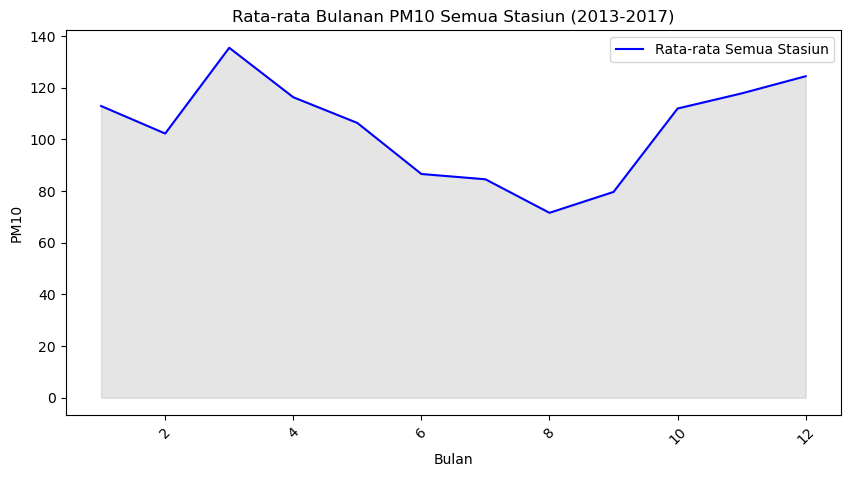

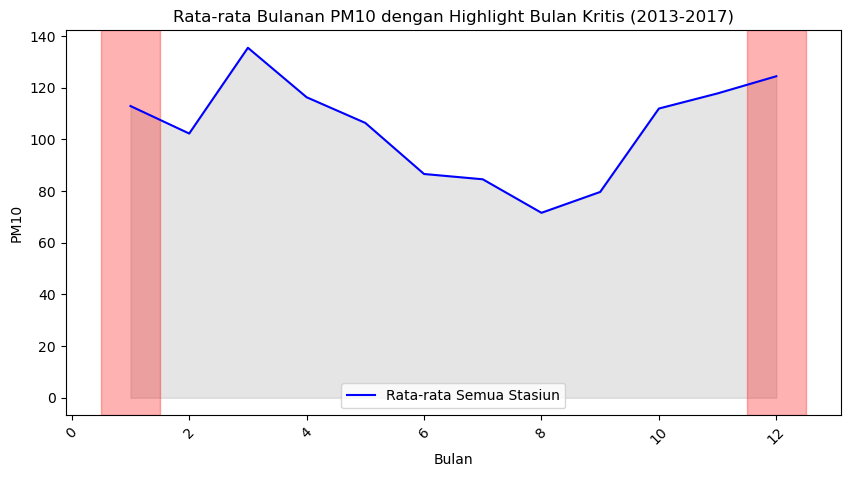

In [85]:
# Menghitung rata-rata keseluruhan dari semua stasiun per bulan
overall_monthly_avg = all_df.groupby('month')[['PM2.5', 'PM10']].mean().reset_index()

# Plot rata-rata keseluruhan PM10 dari semua stasiun
plt.figure(figsize=(10,5))
plt.fill_between(overall_monthly_avg['month'], 0, overall_monthly_avg['PM10'], color='gray', alpha=0.2)
sns.lineplot(data=overall_monthly_avg, x='month', y='PM10', color='blue', label='Rata-rata Semua Stasiun')
plt.title('Rata-rata Bulanan PM10 Semua Stasiun (2013-2017)')
plt.xlabel('Bulan')
plt.ylabel('PM10')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Highlight bulan kritis dengan lonjakan PM10
critical_months = [1, 12]  # Contoh bulan dengan kualitas udara buruk

# Plot dengan highlight pada bulan kritis
plt.figure(figsize=(10,5))
plt.fill_between(overall_monthly_avg['month'], 0, overall_monthly_avg['PM10'], color='gray', alpha=0.2)
sns.lineplot(data=overall_monthly_avg, x='month', y='PM10', color='blue', label='Rata-rata Semua Stasiun')

# Highlight bulan kritis dengan warna yang berbeda
for month in critical_months:
    plt.axvspan(month-0.5, month+0.5, color='red', alpha=0.3)

plt.title('Rata-rata Bulanan PM10 dengan Highlight Bulan Kritis (2013-2017)')
plt.xlabel('Bulan')
plt.ylabel('PM10')
plt.xticks(rotation=45)
plt.legend()
plt.show()



**insght**
- Pola Lonjakan di Awal dan Akhir Tahun:
Dari grafik, terlihat bahwa polusi udara PM10 cenderung tinggi pada bulan Januari dan Desember. Ini ditunjukkan oleh area berwarna merah pada kedua grafik, yang meng-highlight bulan-bulan kritis. Ini bisa mengindikasikan bahwa kualitas udara memburuk selama musim dingin, yang mungkin disebabkan oleh faktor cuaca, peningkatan aktivitas industri, atau faktor lainnya.

- Periode Pertengahan Tahun Lebih Baik:
Kualitas udara terlihat lebih baik di pertengahan tahun (sekitar bulan Juni hingga Agustus), dengan nilai PM10 yang lebih rendah. Ini menunjukkan adanya pola musiman di mana kualitas udara cenderung membaik di bulan-bulan musim panas.

- Polusi Udara Kembali Meningkat di Akhir Tahun:
Setelah menurun di pertengahan tahun, polusi udara kembali meningkat mulai bulan September hingga Desember, menunjukkan bahwa musim dingin mungkin menjadi waktu yang perlu diwaspadai untuk kualitas udara yang lebih buruk.

- Kesimpulan:
  - Berdasarkan pola ini, lo bisa menyimpulkan bahwa bulan-bulan awal dan akhir tahun (Januari dan Desember) adalah periode kritis untuk polusi udara, sementara pertengahan tahun cenderung memiliki kualitas udara yang lebih baik. Insight ini bisa digunakan untuk merencanakan tindakan mitigasi polusi yang lebih fokus di bulan-bulan tersebut.

**Pertanyaan**
- Bagaimana pengaruh cuaca seperti suhu, kecepatan angin, dan curah hujan terhadap tingkat polutan di berbagai stasiun? Apakah ada pola tertentu?


c:\Users\Alert76\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


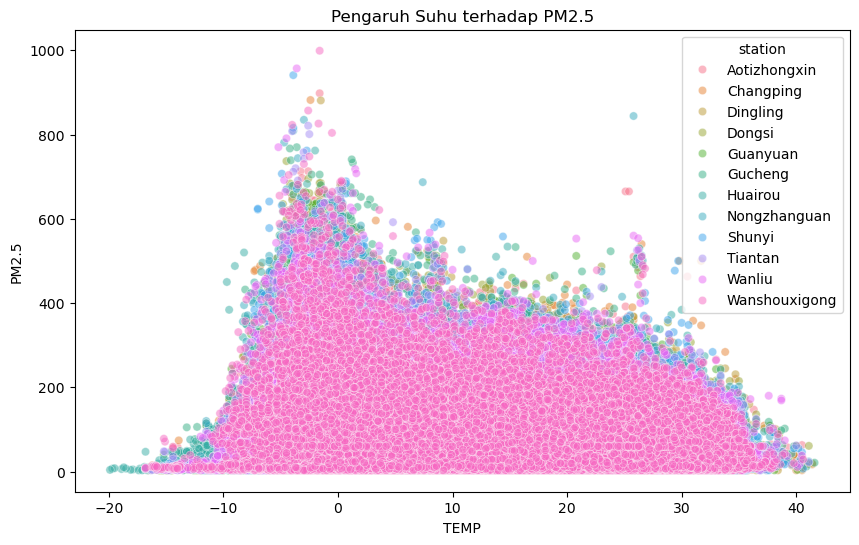

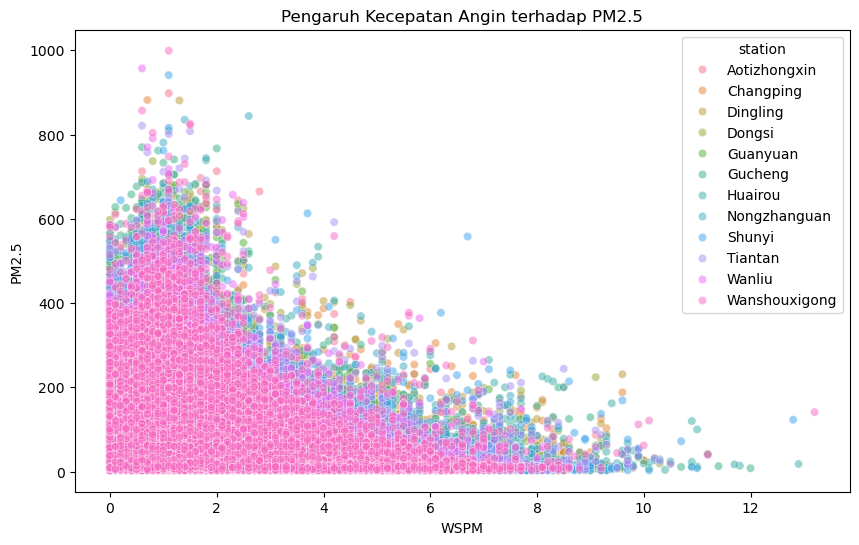

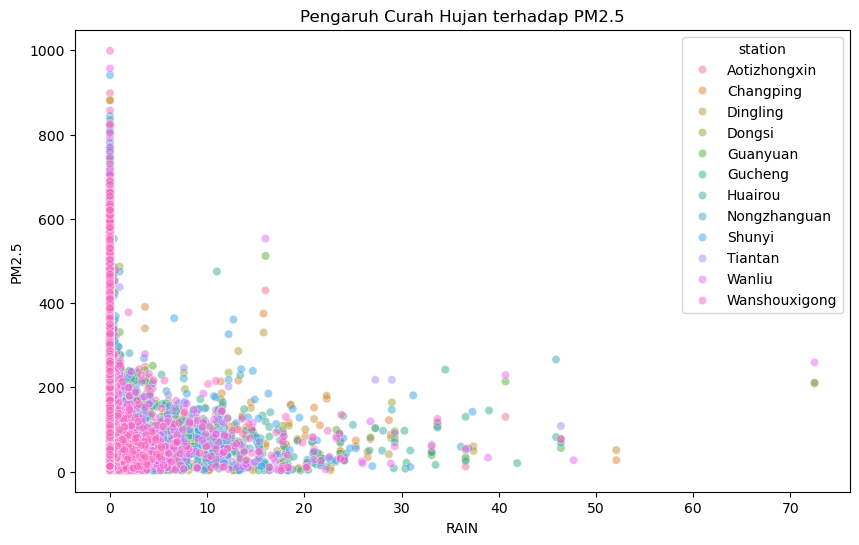

In [63]:
# Scatter plot between Temperature and PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(x='TEMP', y='PM2.5', hue='station', data=all_df, alpha=0.5)
plt.title('Pengaruh Suhu terhadap PM2.5')
plt.show()

# Scatter plot between Wind Speed and PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(x='WSPM', y='PM2.5', hue='station', data=all_df, alpha=0.5)
plt.title('Pengaruh Kecepatan Angin terhadap PM2.5')
plt.show()

# Scatter plot between Rain and PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(x='RAIN', y='PM2.5', hue='station', data=all_df, alpha=0.5)
plt.title('Pengaruh Curah Hujan terhadap PM2.5')
plt.show()

**Insight :**
-Pengaruh Suhu (TEMP) terhadap PM2.5:
    Insight: Dari scatter plot pertama, 
    terlihat bahwa ketika suhu di bawah 0°C (terutama di sekitar -10°C hingga 0°C), konsentrasi PM2.5 lebih tinggi. Seiring dengan kenaikan suhu, konsentrasi PM2.5 cenderung menurun. Ini menunjukkan adanya hubungan negatif antara suhu dan tingkat polusi udara.
    Interpretasi: Pada suhu rendah, kemungkinan polusi udara lebih tinggi karena stagnasi udara dan kurangnya aliran udara, sedangkan pada suhu yang lebih tinggi, polusi cenderung menyebar lebih cepat sehingga tingkat PM2.5 menurun.

- Pengaruh Kecepatan Angin (WSPM) terhadap PM2.5:
    Insight: Scatter plot kedua menunjukkan bahwa semakin tinggi kecepatan angin (di atas 4 m/s), tingkat PM2.5 cenderung menurun secara signifikan. Pada kecepatan angin yang rendah (di bawah 2 m/s), konsentrasi PM2.5 cukup tinggi.
    Interpretasi: Angin berperan penting dalam menyebarkan polusi udara. Ketika kecepatan angin rendah, polusi terkumpul di satu tempat, sementara angin kencang membantu mengurangi konsentrasi polusi.

- Pengaruh Curah Hujan (RAIN) terhadap PM2.5:
    Insight: Pada scatter plot ketiga, ada pola yang jelas di mana hujan cenderung mengurangi konsentrasi PM2.5. Ketika curah hujan meningkat, tingkat PM2.5 secara umum menurun, terutama di atas 10mm curah hujan.
    Interpretasi: Curah hujan membantu mengurangi polutan di udara melalui proses “washout,” di mana partikel polusi tersapu turun oleh air hujan.

**Pertanyaan**
- Bagaimana perbandingan kualitas udara di antara berbagai stasiun? Stasiun mana yang secara konsisten memiliki kualitas udara lebih baik atau lebih buruk, dan apa faktor yang berkontribusi?


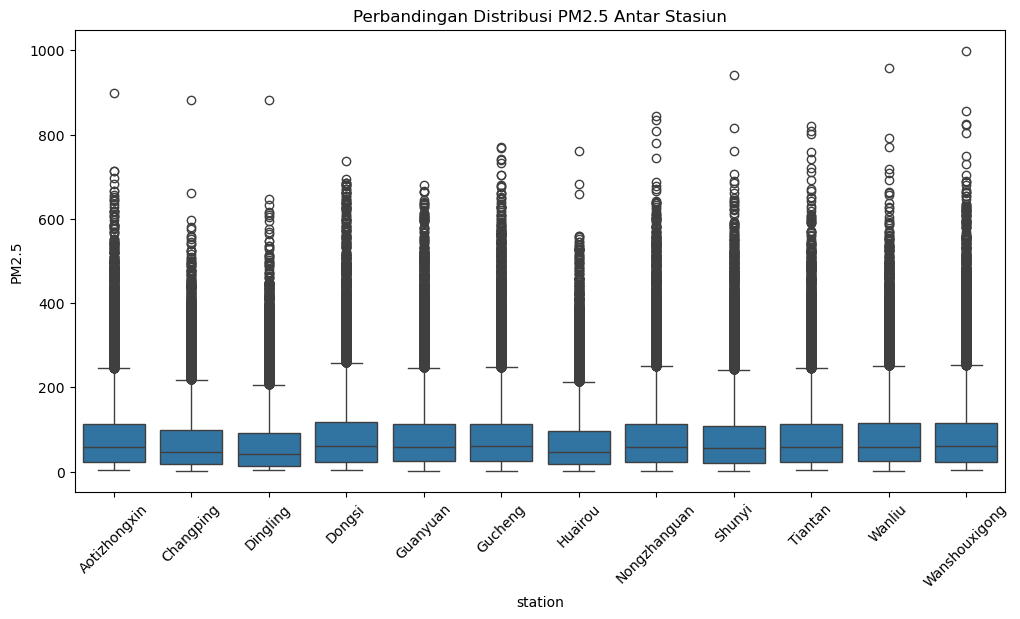

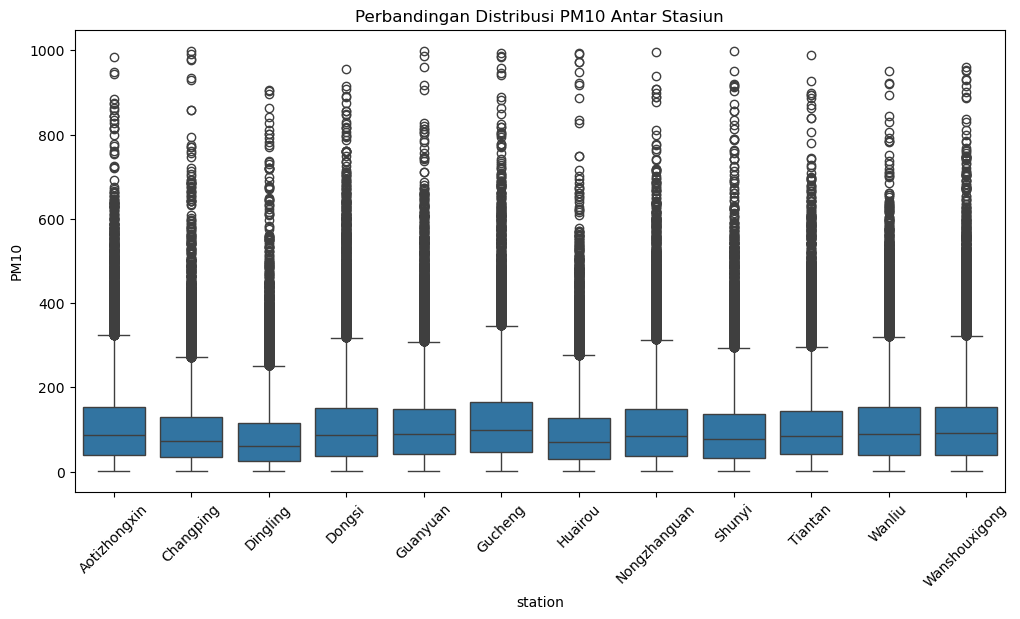

In [64]:
# Boxplot untuk melihat distribusi PM2.5 di setiap stasiun
plt.figure(figsize=(12,6))
sns.boxplot(x='station', y='PM2.5', data=all_df)
plt.title('Perbandingan Distribusi PM2.5 Antar Stasiun')
plt.xticks(rotation=45)
plt.show()

# Boxplot untuk melihat distribusi PM10 di setiap stasiun
plt.figure(figsize=(12,6))
sns.boxplot(x='station', y='PM10', data=all_df)
plt.title('Perbandingan Distribusi PM10 Antar Stasiun')
plt.xticks(rotation=45)
plt.show()

**Insight :**

- Outlier yang Tinggi: Beberapa stasiun seperti Guanyuan dan Dongsi secara konsisten menunjukkan outlier yang tinggi pada kedua indikator PM2.5 dan PM10. Ini bisa berarti bahwa ada periode waktu tertentu di mana polusi udara di stasiun-stasiun ini meningkat drastis  dibanding stasiun lainnya.

- Distribusi yang Seragam di Sebagian Stasiun: Sebagian besar stasiun lain memiliki distribusi yang cukup seragam dengan sedikit outlier. Ini menunjukkan bahwa kualitas udara mereka cenderung lebih stabil, meskipun pada dasarnya kualitas udara secara umum masih tergolong buruk dengan nilai median PM2.5 dan PM10 yang tinggi.

- Faktor yang Berkontribusi:
    - Lokasi Geografis: Beberapa stasiun yang berada di lokasi yang lebih padat atau dekat dengan pusat industri mungkin lebih rentan terhadap peningkatan polusi udara.
    - Kondisi Cuaca: Cuaca lokal seperti suhu rendah atau angin yang lemah di area tertentu mungkin menjadi faktor yang menyebabkan akumulasi polutan di stasiun tertentu.

- Kesimpulan:
    - Stasiun Guanyuan dan Dongsi adalah dua stasiun yang secara konsisten menunjukkan kualitas udara yang lebih buruk, terutama dengan adanya outlier yang tinggi. Sementara stasiun seperti Huairou dan Nongzhanguan cenderung memiliki kualitas udara yang lebih baik dan stabil.
    - Faktor-faktor seperti lokasi dan kondisi cuaca mungkin berperan penting dalam menyebabkan perbedaan kualitas udara antar stasiun.

** Pertanyaan**
- Bagaimana perbandingan kualitas udara di antara berbagai stasiun? Stasiun mana yang secara konsisten memiliki kualitas udara lebih baik atau lebih buruk, dan apa faktor yang berkontribusi?


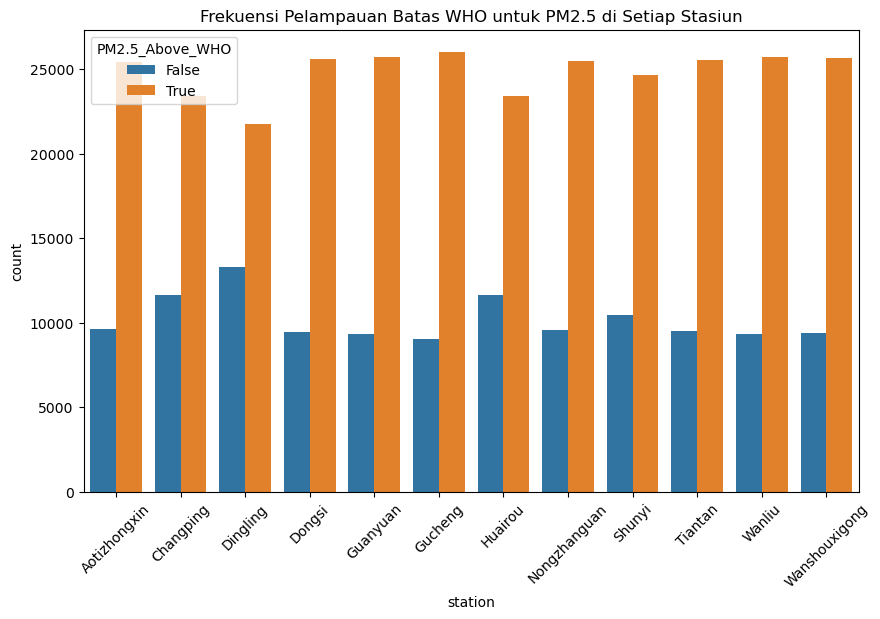

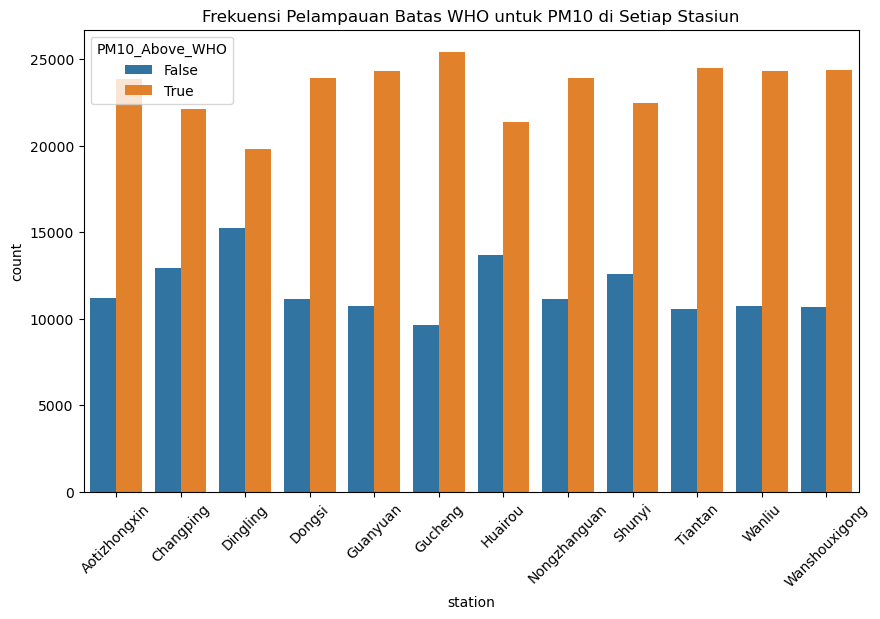

In [65]:
# Menghitung frekuensi pelampauan batas ambang WHO
all_df['PM2.5_Above_WHO'] = all_df['PM2.5'] > 25
all_df['PM10_Above_WHO'] = all_df['PM10'] > 50

# Plotting frequency of WHO threshold breaches for PM2.5 and PM10
plt.figure(figsize=(10,6))
sns.countplot(x='station', hue='PM2.5_Above_WHO', data=all_df)
plt.title('Frekuensi Pelampauan Batas WHO untuk PM2.5 di Setiap Stasiun')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='station', hue='PM10_Above_WHO', data=all_df)
plt.title('Frekuensi Pelampauan Batas WHO untuk PM10 di Setiap Stasiun')
plt.xticks(rotation=45)
plt.show()



**Insight :**

- Stasiun dengan Kualitas Udara Buruk : 
    Stasiun seperti Guanyuan, Gucheng, dan Wanshouxigong secara konsisten memiliki kualitas udara yang buruk karena mayoritas pengukuran PM2.5 dan PM10 melebihi ambang batas WHO. Ini bisa disebabkan oleh faktor geografis seperti kedekatan dengan sumber polusi (industri, transportasi, dll.).

- Stasiun dengan Kualitas Udara Lebih Baik: 
    Stasiun seperti Dingling, Changping, dan Huairou memiliki frekuensi pelampauan ambang batas WHO yang lebih rendah, menandakan kualitas udara yang lebih baik di lokasi-lokasi ini.

- Faktor yang Berkontribusi:
    - Lokasi Geografis: Stasiun yang terletak di daerah dengan aktivitas industri atau lalu lintas tinggi mungkin mengalami lebih banyak pelampauan ambang batas WHO.
    - Faktor Cuaca: Angin atau curah hujan yang lebih tinggi di beberapa stasiun mungkin membantu mengurangi polutan di udara, sehingga pelampauan batas WHO lebih jarang terjadi di stasiun-stasiun tersebut.

-Kesimpulan:
    Stasiun seperti Guanyuan, Gucheng, dan Wanshouxigong secara konsisten memiliki kualitas udara yang buruk berdasarkan frekuensi pelampauan ambang batas WHO untuk PM2.5 dan PM10. Sebaliknya, stasiun seperti Dingling, Changping, dan Huairou menunjukkan kualitas udara yang lebih baik.


## Analisis Lanjutan (Opsional)

In [66]:
# RFM

recency_df = all_df.groupby('station')['date_time'].max().reset_index()
recency_df['recency'] = (all_df['date_time'].max() - recency_df['date_time']).dt.days

frequency_df = all_df.groupby('station').agg({'PM2.5_Above_WHO': 'sum', 'PM10_Above_WHO': 'sum'}).reset_index()
frequency_df['frequency'] = frequency_df['PM2.5_Above_WHO'] + frequency_df['PM10_Above_WHO']
frequency_df = frequency_df[['station', 'frequency']]

monetary_df = all_df.groupby('station').agg({'PM2.5': 'mean', 'PM10': 'mean'}).reset_index()
monetary_df['monetary'] = (monetary_df['PM2.5'] + monetary_df['PM10']) / 2

rfm_df = recency_df.merge(frequency_df, on='station').merge(monetary_df[['station', 'monetary']], on='station')

rfm_df.head()

,station,date_time,recency,frequency,monetary
0,Aotizhongxin,2017-02-28 23:00:00,0,49294,95.854131
1,Changping,2017-02-28 23:00:00,0,45543,82.413742
2,Dingling,2017-02-28 23:00:00,0,41610,74.364951
3,Dongsi,2017-02-28 23:00:00,0,49571,97.804164
4,Guanyuan,2017-02-28 23:00:00,0,50066,95.645618


## Conclusion


- Recency: Semua stasiun memiliki recency 0 (pengukuran terbaru pada 28 Februari 2017), menunjukkan data terkini.

- Frequency: Stasiun Guanyuan (50,066), Dongsi (49,571), dan Aotizhongxin (49,294) memiliki frekuensi tertinggi, menandakan seringnya polusi melebihi ambang batas WHO. Dingling memiliki frekuensi terendah (41,610).

- Monetary: Dongsi memiliki kadar polusi tertinggi (97.80), diikuti oleh Aotizhongxin (95.85) dan Guanyuan (95.65). Dingling memiliki kadar polusi terendah (74.36).

- Kesimpulan:
Dongsi, Aotizhongxin, dan Guanyuan memerlukan perhatian khusus karena seringnya polusi dan kadar tinggi. Dingling lebih rendah, tetapi tetap di atas batas WHO.

In [67]:
# Import Data
all_df.to_csv("Dashboard/all_df.csv", index=False)